In [1]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/student-mat.csv')
print(myData.shape)

(395, 33)


In [2]:
peek = myData.head(10)
print(peek)

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...  

In [3]:
shape = myData.shape
print(shape)

(395, 33)


In [4]:
types = myData.dtypes
print(types)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [6]:
outcome_counts = myData.groupby('sex').size()
print(outcome_counts)

sex
F    208
M    187
dtype: int64


In [7]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

              age   Medu   Fedu  traveltime  studytime  failures  famrel  freetime  goout   Dalc  \
age         1.000 -0.164 -0.163       0.071     -0.004     0.244   0.054     0.016  0.127  0.131   
Medu       -0.164  1.000  0.623      -0.172      0.065    -0.237  -0.004     0.031  0.064  0.020   
Fedu       -0.163  0.623  1.000      -0.158     -0.009    -0.250  -0.001    -0.013  0.043  0.002   
traveltime  0.071 -0.172 -0.158       1.000     -0.101     0.092  -0.017    -0.017  0.029  0.138   
studytime  -0.004  0.065 -0.009      -0.101      1.000    -0.174   0.040    -0.143 -0.064 -0.196   
failures    0.244 -0.237 -0.250       0.092     -0.174     1.000  -0.044     0.092  0.125  0.136   
famrel      0.054 -0.004 -0.001      -0.017      0.040    -0.044   1.000     0.151  0.065 -0.078   
freetime    0.016  0.031 -0.013      -0.017     -0.143     0.092   0.151     1.000  0.285  0.209   
goout       0.127  0.064  0.043       0.029     -0.064     0.125   0.065     0.285  1.000  0.267   


<AxesSubplot:ylabel='Frequency'>

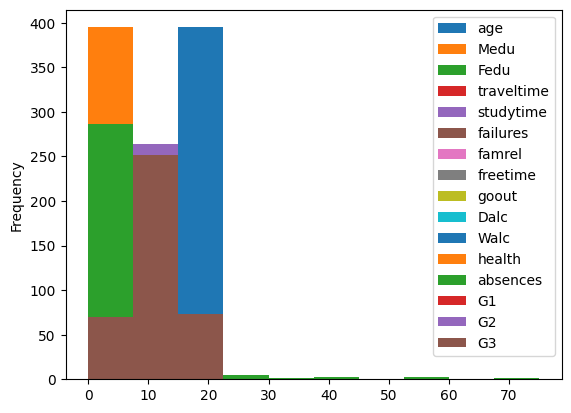

In [8]:
import matplotlib.pyplot as plt
myData.plot.hist()

In [9]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

ValueError: Layout of 3x3 must be larger than required size 16

<Figure size 1000x1000 with 0 Axes>

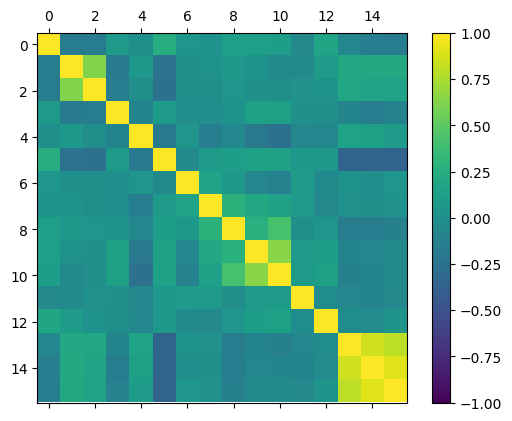

In [10]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [13]:
X = myData.drop('sex', axis=1).values
Y = myData['sex'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.    0.    1.    0.    1.    1.    0.75  1.    0.5   1.    0.5   0.
  0.333 0.    0.    0.    0.    0.    1.    1.    1.    0.    0.75  0.75
  0.    0.    0.    0.    0.    0.625 0.737 0.75 ]
 [0.    0.    1.    0.    1.    1.    1.    0.25  0.25  0.667 0.    0.
  0.    0.    0.    1.    1.    0.    1.    1.    1.    0.    1.    0.75
  0.25  0.    0.    1.    0.    0.562 0.789 0.75 ]
 [0.    0.143 1.    1.    1.    1.    0.5   1.    0.5   0.    0.5   0.
  0.333 0.    0.    0.    0.    1.    1.    1.    1.    0.    0.75  1.
  0.    0.    0.5   1.    0.027 0.75  0.789 0.8  ]
 [0.    0.143 1.    1.    1.    0.5   0.5   0.5   0.5   1.    0.5   0.333
  0.333 0.    0.    1.    0.    1.    1.    1.    1.    0.    1.    0.75
  0.75  0.25  0.75  1.    0.    0.625 0.684 0.6  ]
 [0.    0.    0.    0.    1.    0.5   1.    0.75  0.25  0.    0.5   0.
  0.667 0.    1.    1.    1.    1.    1.    1.    1.    0.    0.75  0.5
  0.25  0.    0.    1.    0.027 0.438 0.474 0.4  ]]


In [14]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('sex', axis=1).values
mydata_label = myData['sex'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.    0.496 0.033 0.    0.033 0.132 0.099 0.132 0.066 0.099 0.033 0.033
  0.066 0.    0.    0.    0.    0.    0.033 0.033 0.033 0.    0.132 0.132
  0.033 0.033 0.033 0.033 0.    0.43  0.463 0.496]
 [0.    0.49  0.033 0.    0.033 0.131 0.131 0.033 0.033 0.065 0.    0.033
  0.033 0.    0.    0.033 0.033 0.    0.033 0.033 0.033 0.    0.163 0.131
  0.065 0.033 0.033 0.163 0.    0.392 0.49  0.49 ]
 [0.    0.483 0.03  0.03  0.03  0.121 0.06  0.121 0.06  0.    0.03  0.03
  0.06  0.    0.    0.    0.    0.03  0.03  0.03  0.03  0.    0.121 0.151
  0.03  0.03  0.091 0.151 0.06  0.453 0.453 0.483]
 [0.    0.539 0.034 0.034 0.034 0.067 0.067 0.067 0.067 0.101 0.034 0.067
  0.067 0.    0.    0.034 0.    0.034 0.034 0.034 0.034 0.    0.168 0.135
  0.135 0.067 0.135 0.168 0.    0.438 0.438 0.404]
 [0.    0.623 0.    0.    0.042 0.083 0.166 0.125 0.042 0.    0.042 0.042
  0.125 0.    0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.    0.166 0.125
  0.083 0.042 0.042 0.208 0.083 0.416 0.374 0.332]]


In [15]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1]]


In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('sex', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('sex', axis=1).values
mydata_label = myData['sex'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[5.933e-02 3.219e-01 3.196e-01 3.199e+00 2.161e-01 2.420e+00 4.787e-01
 1.495e+01 2.857e+00 3.645e+00 2.011e+00 1.407e+00 4.068e+01 7.775e-01
 7.660e+00 9.247e+00 6.664e+00 3.956e+00 2.644e-02 9.177e+00 7.662e-01
 4.134e+00 1.371e+00 2.375e+01 2.277e+00 3.045e+01 3.195e+01 8.273e+00
 1.770e+00 3.343e+00 3.289e+00 4.252e+00]


In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False False False False False False False False False False
  True False  True False False  True False  True False False False False
 False False False False False False False False]
Feature Ranking: [ 4 21 10 16 17 18 24  9 29 22  7 20  1 27  1  5  8  1 12  1 11  2 15  6
 14  3 13 19 26 23 28 25]


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.497 0.327 0.024]
[[-3.469e-03  2.859e-02 -1.503e-03  2.052e-03 -5.154e-03  1.385e-02
   3.348e-03  7.922e-03  9.279e-04  1.793e-02  1.107e-02 -1.041e-03
  -6.795e-03  6.178e-03  9.324e-04  1.493e-03  5.224e-04 -8.989e-04
   9.310e-04 -1.578e-03  4.737e-03  9.078e-03 -5.002e-03 -7.153e-03
   6.708e-03  1.297e-02  2.283e-02 -5.294e-03  9.983e-01 -1.488e-02
  -1.687e-02  1.825e-02]
 [ 2.460e-03  2.919e-02 -7.173e-03 -5.681e-03  2.241e-03 -4.008e-02
  -3.088e-02 -2.065e-02 -7.833e-03 -2.382e-02  6.163e-03  1.438e-02
  -1.733e-02  4.386e-02  6.492e-03  3.998e-03 -7.429e-03 -3.153e-03
  -4.230e-03 -6.553e-03 -6.209e-03  7.866e-03 -3.337e-03 -1.019e-04
   2.713e-02  1.035e-02  1.798e-02  1.785e-02 -4.542e-03 -4.609e-01
  -5.589e-01 -6.829e-01]
 [ 4.823e-03  1.509e-01 -9.272e-03 -1.235e-02  6.620e-03 -6.438e-03
   2.588e-02 -6.144e-02 -7.817e-03  5.526e-02  3.082e-02 -1.199e-02
   1.220e-01 -2.808e-02 -3.140e-02 -1.241e-02 -2.303e-02  1.635e-02
   1.439e-02  3.007e-03 -8

In [19]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(395, 8)


In [20]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(395, 18)


In [22]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['num'] = pd.cut(myData['sex'], bins=3, labels=[0, 1, 2])
mydata_label = myData['sex'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.014 0.036 0.018 0.021 0.015 0.032 0.031 0.046 0.03  0.032 0.026 0.025
 0.078 0.019 0.02  0.029 0.028 0.029 0.018 0.011 0.018 0.022 0.032 0.047
 0.032 0.043 0.061 0.042 0.034 0.04  0.033 0.036]
